# Problem Statement
Data manipulation on the sample survey data (Sample Survey.xlsx) for analysis. Challenge is do manipulation purely through in-built functions of Pandas instead of using for-loop and Matplotlib for any plotting.

##### Understanding Dataset
On general analysis it was observed that the dataset contains data from survey conducted based on voting poll. Data is majorly demographic data of categorical type.EDA will further analyse the nature of data.
    
    I have not done any EDA as it was not part of the assignment.

In [301]:
#importing all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [302]:
# from sklearn import preprocessing

### 1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [303]:
#set the path variable
path = 'C:/Users/vassu/Desktop/survey.xlsx'

# Load the dataframe
survey = pd.read_excel(path)

#display the shape of dataframe
print('Shape of the data is: ',survey.shape)
survey.head()

Shape of the data is:  (6867, 14)


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [304]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [305]:
survey['collection_date'].nunique()

9

In [306]:
for col in survey.columns:
    if survey[col].nunique()<= 10:
        print(survey[col].value_counts())
        print('#########################')

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64
#########################
Rural    5135
Urban    1732
Name: urban_rural, dtype: int64
#########################
Graduate                  3322
12th Pass                 1330
Post - Graduation         1211
Professional Education     404
10th Pass                  398
8th Pass                   179
Illiterate                  23
Name: education, dtype: int64
#########################
₹ 5,000 - ₹ 10,000       1671
BPL/Below ₹ 5,000        1484
₹ 10,000 - ₹ 20,000      1022
₹ 20,000 - ₹ 30,000       781
₹ 30,000 - ₹ 50,000       577
₹ 1,50,000 & above        543
₹ 50,000 - ₹ 80,000       432
₹ 80,000 - ₹ 1,50,000     357
Name: income, dtype: int64
#########################
Fully Dissatisfied       3012
Somewhat Satisfied       2218
Fully Satisfied           721
Somewhat Dissatisfied    

### 2. How many samples were collected on each day?

In [307]:
print(survey['collection_date'].value_counts())

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64


### 3. What proportion of the total respondents were aged less than 45?

In [308]:
survey['age']=pd.to_numeric(survey['age'], errors='coerce')

In [309]:
proportion = len(survey[survey['age']<45]) / len(survey) 

In [310]:
proportion

0.9317023445463812

### 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:

In [311]:
#18-25, 25-40, 40-55 and 55+.

In [312]:
#creating bins for bucketization
bins = [18, 25, 40, 55, 60]
#crating labels for bins
labels = ['18-25', '25-40', '40-55', '55+']
#aging bucket
survey['age_group'] = pd.cut(survey.age, bins, labels = labels,include_lowest = True)


In [313]:
data = [survey["age"], survey["age_group"]]

headers = ["age", "age_group"]

df_new = pd.concat(data, axis=1, keys=headers)

df_new

,age,age_group
0,26.0,25-40
1,34.0,25-40
2,25.0,18-25
3,36.0,25-40
4,22.0,18-25
...,...,...
6862,25.0,18-25
6863,30.0,25-40
6864,20.0,18-25
6865,23.0,18-25


### 5. How many samples were collected for each age-group? Which age-group had the most samples?

In [314]:
print(survey['age_group'].value_counts())

25-40    3423
18-25    2691
40-55     644
55+        48
Name: age_group, dtype: int64


In [315]:
print(survey['age_group'].value_counts().max())

3423


### 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [316]:
#checking unique count of each category of Vote Now column
print(survey['Vote_Now'].value_counts())

BJP           2367
RJD           1996
JD(U)          526
NOTA           458
JAP(L)         313
Plurals        217
INC            216
Undecided      164
RJJP           142
LJP            102
Others          87
RLSP            82
Left Front      79
AIMIM           37
VIP             28
AAP             27
BSP             15
HAM             11
Name: Vote_Now, dtype: int64


In [317]:
#finding proportion of people who voted for RJD party
proportion = len(survey[survey['Vote_Now']=='RJD']) / len(survey) 
proportion

0.290665501674676

In [318]:
#finding proportion of people who previously voted for RJD party
proportion = len(survey[survey['Past_Vote']=='RJD']) / len(survey) 
proportion

0.15246832678025338

### 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [319]:
#day wise collection of samples
day_wise_vote=survey.collection_date.value_counts()
day_wise_vote

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

In [320]:
#creating a column for fully satified which contains sum of people fully satisfied with CM
survey['Fully_Satisfied'] = (survey["CM_satisfaction"] == "Fully Satisfied").astype(float)
#grouping by date for votes 
day_wise_satisfaction = survey.groupby("collection_date").agg({'Fully_Satisfied': 'sum','CM_satisfaction': 'count'})
#finding total votes 
day_wise_satisfaction.rename(columns={'CM_satisfaction': 'vote'}, inplace=True)
#finding proportion of fully satisfied vs total votes
day_wise_satisfaction['proportion'] = day_wise_satisfaction['Fully_Satisfied'] / day_wise_satisfaction['vote']

In [321]:
day_wise_satisfaction

,Fully_Satisfied,vote,proportion
collection_date,,,
2020-08-24,146.0,1479,0.098715
2020-08-25,95.0,998,0.095190
2020-08-26,59.0,598,0.098662
2020-08-27,54.0,665,0.081203
2020-08-28,92.0,761,0.120894
2020-08-29,73.0,620,0.117742
2020-08-30,65.0,582,0.111684
2020-08-31,62.0,557,0.111311
2020-09-01,75.0,607,0.123558


In [322]:
#dropping columns for easier visualization through line chart
day_wise_satisfaction.drop(['Fully_Satisfied','vote'],axis=1,inplace=True)

### 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [323]:
#creating a column for fully satified which contains sum of people fully dissatisfied with CM
survey['Fully_Dissatisfied'] = (survey["CM_satisfaction"] == "Fully Dissatisfied").astype(float)
#grouping by date for votes
day_wise_dissatisfaction = survey.groupby("collection_date").agg({'Fully_Dissatisfied': 'sum',
                                                  'CM_satisfaction': 'count'})
#finding total votes 
day_wise_dissatisfaction.rename(columns={'CM_satisfaction': 'vote'}, inplace=True)
#finding proportion of fully dissatisfied vs total votes
day_wise_dissatisfaction['proportion'] = day_wise_dissatisfaction['Fully_Dissatisfied'] / day_wise_dissatisfaction['vote']

In [324]:
day_wise_dissatisfaction

,Fully_Dissatisfied,vote,proportion
collection_date,,,
2020-08-24,642.0,1479,0.434077
2020-08-25,433.0,998,0.433868
2020-08-26,258.0,598,0.431438
2020-08-27,294.0,665,0.442105
2020-08-28,349.0,761,0.458607
2020-08-29,283.0,620,0.456452
2020-08-30,250.0,582,0.429553
2020-08-31,251.0,557,0.450628
2020-09-01,252.0,607,0.415157


In [325]:
#dropping columns for easier visualization through line chart
day_wise_dissatisfaction.drop(['Fully_Dissatisfied','vote'],axis=1,inplace=True)

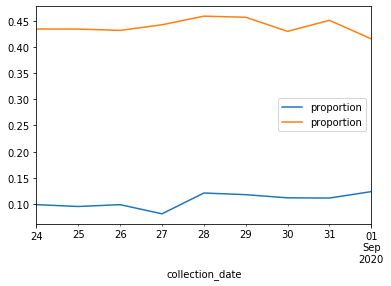

In [326]:
#line chart of collection date vs proportions of satisfied and dissatisfied voters
ax = day_wise_satisfaction.plot()

day_wise_dissatisfaction.plot(ax=ax)

### 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [327]:
pd.crosstab(index=survey['Past_Vote'], columns=survey['Vote_Now'])

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


### 10. Repeat the above question with the cell values as the sum of “weight”.

In [328]:
pd.crosstab(index=survey['Past_Vote'], columns=survey['Vote_Now'], values=survey.weight, aggfunc='sum')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [329]:
#grouping by age group and summing all the samples under each group
df=survey.groupby(['age_group'])
df = df.size()
#resetting the index
df.reset_index(name='Observation')


,age_group,Observation
0,18-25,2691
1,25-40,3423
2,40-55,644
3,55+,48


### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [330]:
#creating condition to filter rows with JDU in vote now column
condition = survey["Vote_Now"] == 'JD(U)'
sv=survey[condition]

In [331]:
#grouping by with respect to age group and vote now
dfs=sv.groupby(['age_group','Vote_Now'])
dfs = dfs.size()
#resetting the index
dfs.reset_index(name='JDU_Observation')


,age_group,Vote_Now,JDU_Observation
0,18-25,JD(U),215
1,25-40,JD(U),245
2,40-55,JD(U),55
3,55+,JD(U),4


### 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [332]:
#coverting series to dataframe and joing them
df.to_frame().join(dfs.to_frame(),lsuffix="Observation", rsuffix="JDU_Observation")

,,0Observation,0JDU_Observation
age_group,Vote_Now,,
18-25,JD(U),2691,215
25-40,JD(U),3423,245
40-55,JD(U),644,55
55+,JD(U),48,4


### ====================================END=======================================